# Validation and Verification of the kernel shots

Here we provide code and analysis of the kernel shots for all cups done using Google Computing Engine. Total of **12,398** shots were computed, processed and analyzed.

In [1]:
from __future__ import print_function

import sys
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.9 (default, Apr  2 2015, 15:33:21) 
[GCC 4.9.2]
Pandas version 0.15.0
Matplotlib version 1.4.2


## We will be reading and looking at data first

In [7]:
dt = pd.read_csv("Shots", header=None, delim_whitespace=True, names=["Cup", "Num", "Col", "ShY", "ShZ", "Dm", "X20L", "X20R", "X50L", "X50R", "X80L", "X80R", "Y20L", "Y20R", "Y50L", "Y50R", "Y80L", "Y80R", "Z20L", "Z20R", "Z50L", "Z50R", "Z80L", "Z80R"])
dt = dt.sort(["Cup", "Num", "Col", "ShY", "ShZ"], ascending=[0, 1, 0, 1, 1])
dt.index = range(0, len(dt))

In [8]:
dt.head() # first five rows

,Cup,Num,Col,ShY,ShZ,Dm,X20L,X20R,X50L,X50R,...,Y50L,Y50R,Y80L,Y80R,Z20L,Z20R,Z50L,Z50R,Z80L,Z80R
0,S,1,25,0,0,1.907266e-16,-22.355306,22.355306,-17.185649,17.185649,...,-17.293853,17.293853,-14.545359,14.545359,-21.611787,20.826188,-17.647240,17.852935,-14.466220,15.765073
1,S,1,25,0,5,1.991874e-16,-22.376457,22.376457,-17.177756,17.177756,...,-17.211615,17.211615,-14.492459,14.492459,-16.609447,25.833688,-12.657302,22.714655,-9.754164,20.645736
2,S,1,25,0,10,2.035176e-16,-22.384272,22.384272,-17.167296,17.167296,...,-17.272254,17.272254,-14.432926,14.432926,-11.482828,30.740801,-7.646440,27.760257,-4.626096,25.644792
3,S,1,25,0,15,2.083157e-16,-22.425377,22.425377,-17.120980,17.120980,...,-17.290000,17.290000,-14.582118,14.582118,-6.410482,35.751543,-2.728603,32.542563,0.419287,30.586320
4,S,1,25,0,20,2.129804e-16,-22.760618,22.760618,-17.309552,17.309552,...,-17.198637,17.198637,-14.579994,14.579994,-1.426784,40.773973,2.570646,37.710427,5.668148,35.675341


In [9]:
dt.tail() # last five rows

,Cup,Num,Col,ShY,ShZ,Dm,X20L,X20R,X50L,X50R,...,Y50L,Y50R,Y80L,Y80R,Z20L,Z20R,Z50L,Z50R,Z80L,Z80R
12393,L,9,15,75,0,1.818398e-16,-15.159589,15.159589,-11.501568,11.501568,...,63.965164,86.162718,65.985564,84.311324,-14.078267,13.907491,-11.487182,11.734141,-9.310760,10.042994
12394,L,9,15,75,5,1.894416e-16,-15.239336,15.239336,-11.512529,11.512529,...,63.965667,86.128686,65.981304,84.241938,-9.069463,18.319223,-6.405459,16.586799,-4.182178,14.870173
12395,L,9,15,75,10,1.937118e-16,-15.256118,15.256118,-11.499348,11.499348,...,63.955141,86.082433,66.086415,84.191954,-4.042055,22.290685,-1.312641,18.855919,0.834548,18.127326
12396,L,9,15,75,15,2.019940e-16,-14.133734,14.133734,-10.054211,10.054211,...,64.065095,86.160654,66.017867,84.321616,1.176803,24.591891,3.624403,20.046290,5.838366,18.453707
12397,L,9,15,75,20,1.013457e-16,-11.600757,11.600757,-10.603047,10.603047,...,61.366755,88.524613,63.153494,86.912929,4.185361,25.144125,6.482131,24.760312,7.837151,24.376499


In [10]:
dt.dtypes # types of the columns

Cup      object
Num       int64
Col       int64
ShY     float64
ShZ     float64
Dm      float64
X20L    float64
X20R    float64
X50L    float64
X50R    float64
X80L    float64
X80R    float64
Y20L    float64
Y20R    float64
Y50L    float64
Y50R    float64
Y80L    float64
Y80R    float64
Z20L    float64
Z20R    float64
Z50L    float64
Z50R    float64
Z80L    float64
Z80R    float64
dtype: object

In [11]:
dt.info() # some summary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12398 entries, 0 to 12397
Data columns (total 24 columns):
Cup     12398 non-null object
Num     12398 non-null int64
Col     12398 non-null int64
ShY     12398 non-null float64
ShZ     12398 non-null float64
Dm      12398 non-null float64
X20L    12398 non-null float64
X20R    12398 non-null float64
X50L    12398 non-null float64
X50R    12398 non-null float64
X80L    12398 non-null float64
X80R    12398 non-null float64
Y20L    12398 non-null float64
Y20R    12398 non-null float64
Y50L    12398 non-null float64
Y50R    12398 non-null float64
Y80L    12398 non-null float64
Y80R    12398 non-null float64
Z20L    12398 non-null float64
Z20R    12398 non-null float64
Z50L    12398 non-null float64
Z50R    12398 non-null float64
Z80L    12398 non-null float64
Z80R    12398 non-null float64
dtypes: float64(21), int64(2), object(1)
memory usage: 2.4 MB


## Plotting dmax values per cup

L 1
0.0 75.0 0.0 80.0
16 17


AttributeError: 'AxesSubplot' object has no attribute 'flat'

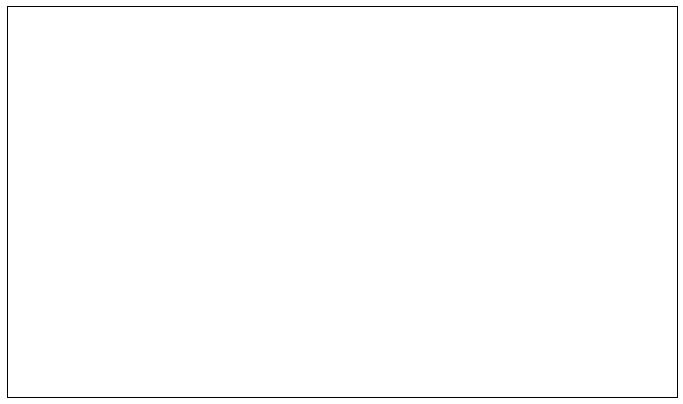

In [15]:
def find_idx_nearby_shot(df, sh_y, sh_z):
    """
    """
    cY = df["ShY"]
    cZ = df["ShZ"]

    for idx in df.index:
        if math.fabs( cY.loc[idx] - sh_y ) < 0.5 and math.fabs( cZ.loc[idx] - sh_z ) < 0.5:
            return idx
            
    return -1

def dmax_at_nearby_shot(df, sh_y, sh_z):
    """
    """
    idx = find_idx_nearby_shot(df, sh_y, sh_z)
    if idx < 0:
        return 0.0
    return df["Dm"].loc[idx]

kk = 0
for cn, dc in dt.groupby(['Cup', 'Num']):
    cup, num = cn
    print(cup, num)
    
    ymin = dc["ShY"].min()
    ymax = dc["ShY"].max()
    zmin = dc["ShZ"].min()
    zmax = dc["ShZ"].max()
    
    print(ymin, ymax, zmin, zmax)
    
    step = 5.0
    ny = int( np.around((ymax - ymin)/step) ) + 1
    nz = int( np.around((zmax - zmin)/step) ) + 1
    print(ny, nz)

    sh_dm = np.empty((nz, ny))

    for iz in range(0, nz):
        z = zmin + float(iz) * step
        for iy in range(0, ny):
            y = ymin + float(iy) * step
            
            dm = dmax_at_nearby_shot(dc, y, z)
            sh_dm[iz, iy] = dm
            
    img = None
    fig, axes = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    for ax in axes.flat:
        img = ax.imshow(sh_dm, interpolation="none")
        title = str(cup) + " " + str(num)
        ax.set_title(title)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.25, 0.05, 0.5])
    fig.colorbar(img, cax=cbar_ax)

    plt.show()
            
    kk += 1
#    if kk > 2:
#        break   